In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

### Загрузка данных

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [5]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [6]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

In [7]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

In [8]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

### Обучение модели 

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [10]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
y = df[['Price']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Стандартизация данных

In [13]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [14]:
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Нейронная сеть

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape=(X_train_scaled.shape[1],), activation='relu', name='input'),
    tf.keras.layers.Dense(8, activation='relu', name='hidden'),
    tf.keras.layers.Dense(1, activation='linear', name='output'),
])


In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 12)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
History = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=16,
                    validation_data=(X_test_scaled, y_test_scaled),callbacks = [early_stop])

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0281 - mae: 0.1232 - val_loss: 0.0125 - val_mae: 0.0889
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - mae: 0.0821 - val_loss: 0.0080 - val_mae: 0.0713
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mae: 0.0661 - val_loss: 0.0052 - val_mae: 0.0574
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - mae: 0.0529 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mae: 0.0433 - val_loss: 0.0024 - val_mae: 0.0388
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0380 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0020 - val_mae: 0.0358
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mae: 0.0363 - val_loss: 0.0020 - val_mae: 0.0362
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [20]:
predictions_scaled = model.predict(X_test_scaled)

predictions_dollars = scaler_y.inverse_transform(predictions_scaled)
real_prices_dollars = scaler_y.inverse_transform(y_test_scaled)
error_in_dollars = mean_absolute_error(real_prices_dollars, predictions_dollars)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
print('MAE:', metrics.mean_absolute_error(real_prices_dollars, predictions_dollars))
print('MSE:', metrics.mean_squared_error(real_prices_dollars, predictions_dollars))
print('RMSE:', np.sqrt(metrics.mean_squared_error(real_prices_dollars, predictions_dollars)))
print('R2 Score:', metrics.r2_score(real_prices_dollars, predictions_dollars))

MAE: 81573.48911830153
MSE: 10179223318.423494
RMSE: 100892.13704954165
R2 Score: 0.9137429424719334


### Линейная регрессия

In [22]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

lr_predictions = lrm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))
print('R2 Score:', metrics.r2_score(y_test, lr_predictions))

MAE: 81135.56609336879
MSE: 10068422551.400927
RMSE: 100341.5295448546
R2 Score: 0.9146818498754012


In [23]:
coeff_df = pd.DataFrame(lrm.coef_[0], X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                              Coefficient
Avg. Area House Age           165590.3927
Avg. Area Number of Rooms     119827.7834
Avg. Area Number of Bedrooms    2361.0953
Avg. Area Income                  21.6258
Area Population                   15.2166


### XGBoost

In [24]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [25]:
xgb_pred_scaled = xgb_model.predict(X_test_scaled)
xgb_pred = scaler_y.inverse_transform(xgb_pred_scaled.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test_scaled)

In [26]:
print(f'MAE: ${mean_absolute_error(y_test_real, xgb_pred):,.2f}')
print(f'R2 Score: {r2_score(y_test_real, xgb_pred):.4f}')

MAE: $88,096.65
R2 Score: 0.8964


### Сравнение моделей

In [27]:
results = {
    'Модель': ['Linear Regression', 'Neural Network (ANN)', 'XGBoost'],
    'MAE ($)': [metrics.mean_absolute_error(y_test, lr_predictions), metrics.mean_absolute_error(real_prices_dollars, predictions_dollars), mean_absolute_error(y_test_real, xgb_pred)],
    'R2 Score': [metrics.r2_score(y_test, lr_predictions),metrics.r2_score(real_prices_dollars, predictions_dollars), r2_score(y_test_real, xgb_pred)]    
}

df_results = pd.DataFrame(results)
print(df_results)

                 Модель    MAE ($)  R2 Score
0     Linear Regression 81135.5661    0.9147
1  Neural Network (ANN) 81573.4891    0.9137
2               XGBoost 88096.6550    0.8964


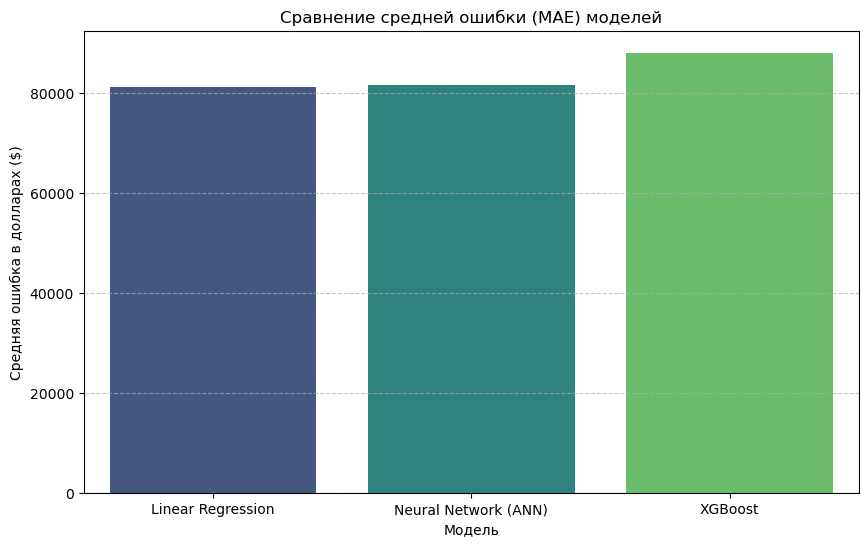

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Модель', y='MAE ($)', data=df_results, palette='viridis')
plt.title('Сравнение средней ошибки (MAE) моделей')
plt.ylabel('Средняя ошибка в долларах ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Вывод

Результаты исследования показывают, что для предсказания цен на жилье в этом районе лучше всего подходит обычная линейная регрессия. Она показала самую низкую среднюю ошибку в $81,135 и самый высокий коэффициент точности (0.9147). Это означает, что зависимости в данных очень логичны и прямолинейны: например, чем выше доход жителей или возраст дома, тем предсказуемее растет его цена.
Сложные методы, такие как нейросеть и XGBoost, в данном случае не дали преимущества и даже немного проиграли в точности. Таким образом, для этой задачи самым эффективным и понятным решением остается линейная модель.